머신 러닝 등의 알고리즘이 적용된 본격적인 자연어 처리를 위해서는 문자를 숫자로 수치화할 필요가 있습니다.

# 다양한 단어의 표현 방법
카운트 기반의 단어 표현 방법 외에도 다양한 단어의 표현 방법

## 단어의 표현 방법
* 국소 표현(Local Representation) : 해당 단어 그 자체만 봄
* 분산 표현(Distributed Representation) : 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법

이 두 방법의 차이는 국소 표현 방법은 단어의 의미, 뉘앙스를 표현할 수 없지만, 분산 표현 방법은 단어의 뉘앙스를 표현할 수 있음

## 단어 표현의 카테고리화
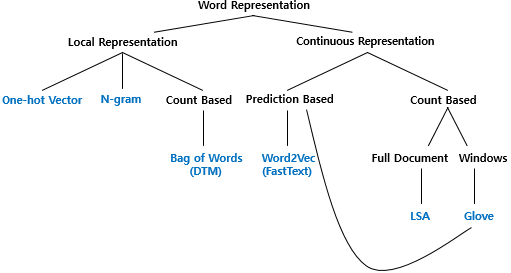
Bag of Words는 국소 표현에(Local Representation)에 속하며, 단어의 빈도수를 카운트(Count)하여 단어를 수치화하는 단어 표현 방법

BoW와 그의 확장인 DTM(또는 TDM)에 대해서 학습하고, 이러한 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 줄 수 있는 TF-IDF에 대해서 학습

# Bag of Words(BoW)
단어의 등장 순서를 고려하지 않는 빈도수 기반의 단어 표현 방법인 Bag of Words에 대해서 학습

## Bag of Words란?
Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

BoW를 만드는 과정
* 각 단어에 고유한 정수 인덱스를 부여
* 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터 생성

In [1]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [4]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

## CountVectorizer 클래스로 BoW 만들기
사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


## 불용어를 제거한 BoW 만들기
영어의 BoW를 만들기 위해 사용하는 CountVectorizer는 불용어를 지정하면, 불용어는 제외하고 BoW를 만들 수 있도록 불용어 제거 기능을 지원

### 사용자가 직접 정의한 불용어 사용

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### CountVectorizer에서 제공하는 자체 불용어 사용

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


### NLTK에서 지원하는 불용어 사용

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# 문서 단어 행렬(Document-Term Matrix, DTM)
서로 다른 문서들의 BoW들을 결합한 표현 방법인 문서 단어 행렬(Document-Term Matrix, DTM) 표현 방법을 학습

## 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법
문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것

예를 들어서 이렇게 4개의 문서가 있다 가정
* <b>문서1 : 먹고 싶은 사과</b>
* <b>문서2 : 먹고 싶은 바나나</b>
* <b>문서3 : 길고 노란 바나나 바나나</b>
* <b>문서4 : 저는 과일이 좋아요</b>
    
이를 문서 단어 행렬로 표현
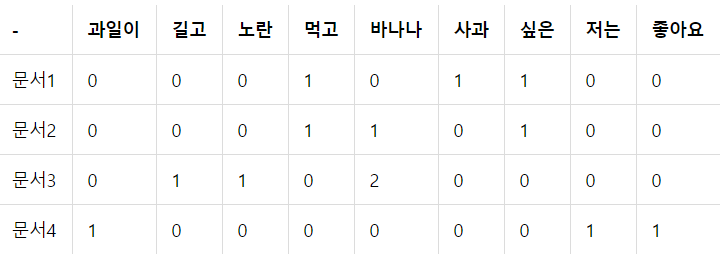
    
## 문서 단어 행렬(Document-Term Matrix)의 한계
DTM은 매우 간단하고 구현하기도 쉽지만, 본질적으로 가지는 몇 가지 한계들이 있음

* 희소 표현(Sparse representation) : 원-핫 벡터는 단어 집합의 크기가 벡터의 차원이 되고 대부분의 값이 0이 된다는 특징이 있었습니다. 이 특징은 공간적 낭비와 계산 리소스를 증가시킬 수 있다는 점에서 원-핫 벡터의 단점이었습니다. DTM도 마찬가지
* 단순 빈도 수 기반 접근

# TF-IDF(Term Frequency-Inverse Document Frequency)
TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 더 많은 정보를 고려하여 문서들을 비교할 수 있습니다.

<span style="color:red;"> 주의할 점은 TF-IDF가 DTM보다 항상 성능이 뛰어나진 않습니다.</span>

## TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)
TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법

TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.

### tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.

### df(t) : 특정 단어 t가 등장한 문서의 수.

### idf(d, t) : df(t)에 반비례하는 수.

## 파이썬으로 TF-IDF 직접 구현하기


In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현

In [2]:
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

이제 TF를 구해보겠습니다. 다시 말해 DTM을 데이터프레임에 저장하여 출력

In [3]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


정상적으로 DTM이 출력되었습니다. 이제 각 단어에 대한 IDF 값을 구해봅시다.

In [4]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


이제 TF-IDF 행렬을 출력

In [5]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


## 사이킷런을 이용한 DTM과 TF-IDF 실습

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
